In [1]:
import torchaudio
import pandas as pd
import torch
from torch.utils.data import DataLoader

In [2]:
audio_path = "birdclef-2025/train_soundscapes/H02_20230420_112000.ogg"

In [3]:
audio, sr = torchaudio.load(audio_path)

duration = audio.shape[1] / sr
print(f"Sampling Rate: {sr}, Duration: {duration} seconds")

Sampling Rate: 32000, Duration: 60.0 seconds


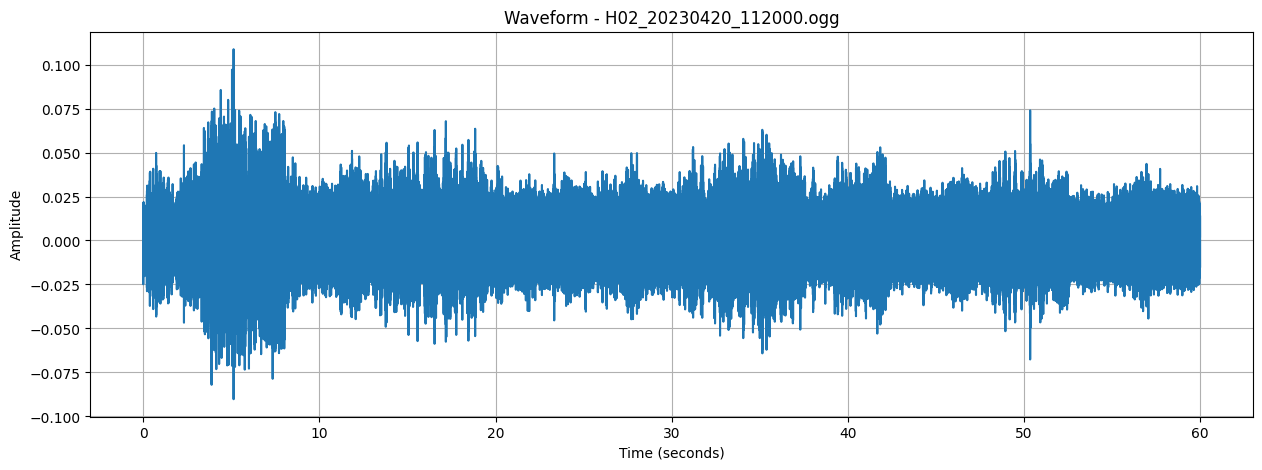

In [4]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
waveform = audio[0].numpy()
time_axis = np.linspace(0, duration, len(waveform))

plt.plot(time_axis, waveform)
plt.title(f"Waveform - {audio_path.split('/')[-1]}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [5]:
AUDIO_DIR = "birdclef-2025/train_audio"
ANNOTATIONS_FILE = "birdclef-2025/train.csv"
NUM_SAMPLES = 22050
TARGET_SAMPLE_RATE = 22050
BATCH_SIZE = 16

N_FFTH = 2048
HOP_LENGTH = 512
N_MELLS = 128

In [6]:
from BirdClefDataset import BirdClefDataset

if torch.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(f"device = {device}")

mel_spectogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=NUM_SAMPLES,
    n_fft=N_FFTH,
    hop_length=HOP_LENGTH,
    n_mels=N_MELLS
)


birdDataset = BirdClefDataset(AUDIO_DIR, ANNOTATIONS_FILE, device, NUM_SAMPLES, TARGET_SAMPLE_RATE, mel_spectogram)

bird_dataset = DataLoader(birdDataset, batch_size=BATCH_SIZE)

device = mps


In [7]:
import os
import pandas as pd

train_df = pd.read_csv(ANNOTATIONS_FILE)
species_list = train_df['primary_label'].unique()
print(f"Number of unique bird species: {len(species_list)}")

file_counts = {}
real_count = 0
print("\nAudio file distribution:")
print("-" * 50)
print(f"{'Species':<20} | {'Count':<10} | {'Percentage':<10}")
print("-" * 50)

for i in os.listdir(AUDIO_DIR):
    species_dir = os.path.join(AUDIO_DIR, i)
    if not os.path.isdir(species_dir):
        continue
    
    count = len(os.listdir(species_dir))
    file_counts[i] = count
    real_count += count
    
for species, count in sorted(file_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / real_count) * 100
    print(f"{species:<20} | {count:<10} | {percentage:.2f}%")

print("-" * 50)
print(f"Total audio files: {real_count}")



Number of unique bird species: 206

Audio file distribution:
--------------------------------------------------
Species              | Count      | Percentage
--------------------------------------------------
grekis               | 990        | 3.47%
compau               | 808        | 2.83%
trokin               | 787        | 2.76%
roahaw               | 709        | 2.48%
banana               | 610        | 2.14%
whtdov               | 572        | 2.00%
socfly1              | 543        | 1.90%
yeofly1              | 525        | 1.84%
bobfly1              | 514        | 1.80%
wbwwre1              | 499        | 1.75%
soulap1              | 487        | 1.70%
sobtyr1              | 478        | 1.67%
trsowl               | 470        | 1.65%
laufal1              | 467        | 1.63%
strcuc1              | 431        | 1.51%
bbwduc               | 424        | 1.48%
saffin               | 419        | 1.47%
amekes               | 409        | 1.43%
tropar               | 397        

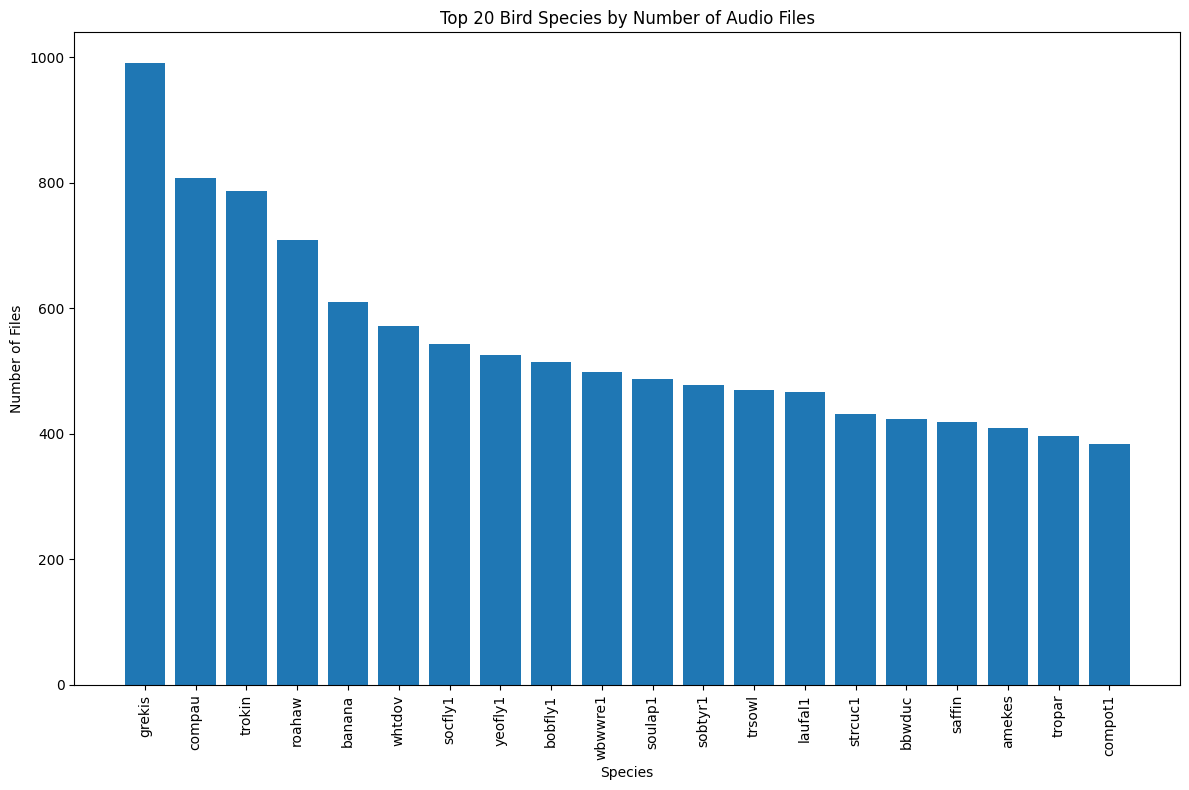

In [8]:
top_species = dict(sorted(file_counts.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(12, 8))
plt.bar(top_species.keys(), top_species.values())
plt.xticks(rotation=90)
plt.title('Top 20 Bird Species by Number of Audio Files')
plt.xlabel('Species')
plt.ylabel('Number of Files')
plt.tight_layout()
plt.show()